#### When to use mean and Median
* if the values are normally distributed, we could use mean or median
* if the distribution is skewd , mean will not give perfect result, median is way to go

#### Note
* When data is missing randomly we can use mean and median
* We more than 5% of the data is missing values we can use mean and median

In [53]:
# loading library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

<span class="badge">Load data </span>

In [4]:
raw_data = pd.read_csv('data/titanic_train.csv',usecols=['age','fare','survived'])

In [5]:
raw_data.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [6]:
#### Checking the percentage of missing values(Na/Nan/None)

In [8]:
raw_data.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

* ['age'] has ~20% missing data
* ['fare'] has small amout of missing data and ['survived'] has no missing data 

#### Note
* To avoid overfitting when a dataset is given make sure to impute(replacing missing values) on train data not test data

<span class="badge"> Train Test Split </span>

In [10]:
#creating featured and target 

In [11]:
featured_data = raw_data.drop('survived',axis=1)
target_data = raw_data['survived']

In [12]:
featured_data.shape,target_data.shape

((850, 2), (850,))

In [13]:
#train_test_split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(featured_data,target_data,test_size=0.2,random_state=42)

In [16]:
#check shape

In [17]:
x_train.shape,y_train.shape

((680, 2), (680,))

In [18]:
x_test.shape,y_test.shape

((170, 2), (170,))

In [19]:
###############
#Working with x_train

In [20]:
x_train.head()

,age,fare
332,18.0,7.7750
383,58.0,146.5208
281,29.0,21.0750
2,30.0,24.1500
231,47.0,227.5250


In [21]:
x_train.isnull().mean() #checking missing percentage again

age     0.207353
fare    0.001471
dtype: float64

In [23]:
### Creating a function to automatic missing values as we can use this function to our test dataset without repeat

In [24]:
def impute_data(data,column,mean_median):
    return data[column].fillna(mean_median)

In [25]:
# Median Age

In [26]:
x_train['age'].median()

28.0

In [30]:
median_age = x_train['age'].median()

In [31]:
median_age

28.0

In [32]:
# Mean Age

In [33]:
mean_age = x_train['age'].mean()
mean_age

29.5139146567718

<span class="badge"> Filling Missing Data </span>

In [34]:
#creating a copy of x_train

In [35]:
x2_train= x_train.copy()

In [36]:
# Median
x2_train['median_age'] = impute_data(x_train,'age',median_age)

In [37]:
#mean
x2_train['mean_age'] = impute_data(x_train,'age',mean_age)

In [40]:
x2_train.head(20)

,age,fare,median_age,mean_age
332,18.0,7.7750,18.0,18.000000
383,58.0,146.5208,58.0,58.000000
281,29.0,21.0750,29.0,29.000000
2,30.0,24.1500,30.0,30.000000
231,47.0,227.5250,47.0,47.000000
457,18.0,17.8000,18.0,18.000000
215,28.5,7.2292,28.5,28.500000
210,NaN,7.8958,28.0,29.513915
657,25.0,41.5792,25.0,25.000000
715,22.0,12.2875,22.0,22.000000


In [41]:
# converting x2['mean_age'] into round data

In [42]:
x2_train['mean_age'] = np.round(x2_train['mean_age'],1)

In [43]:
x2_train.head(20)

,age,fare,median_age,mean_age
332,18.0,7.7750,18.0,18.0
383,58.0,146.5208,58.0,58.0
281,29.0,21.0750,29.0,29.0
2,30.0,24.1500,30.0,30.0
231,47.0,227.5250,47.0,47.0
457,18.0,17.8000,18.0,18.0
215,28.5,7.2292,28.5,28.5
210,NaN,7.8958,28.0,29.5
657,25.0,41.5792,25.0,25.0
715,22.0,12.2875,22.0,22.0


In [49]:
#check the variance of previous ['age'] column and ['median_age'] and ['mean_age']

In [50]:
print('Variance without mean&media: ',x2_train['age'].var())
print('Variance after median: ',x2_train['median_age'].var())
print('Variance after mean: ',x2_train['mean_age'].var())

Variance without mean&media:  212.76707662344668
Variance after median:  168.96147508592043
Variance after mean:  168.58419334228546


In [51]:
# variance is a way to check the individual data in a dataset

<span class="badge"> Visualize </span>

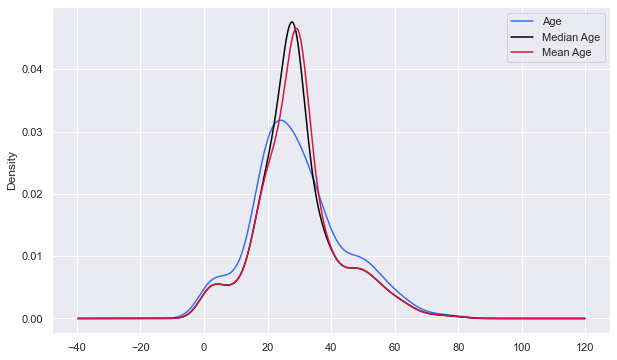

In [61]:
#checking the distribution of ['age']
fig = plt.figure(figsize=(10,6))

x2_train['age'].plot(kind='kde',label='Age')

x2_train['median_age'].plot(kind='kde',label='Median Age',color='black')

x2_train['mean_age'].plot(kind='kde',label='Mean Age',color='crimson')

plt.legend()

plt.show()



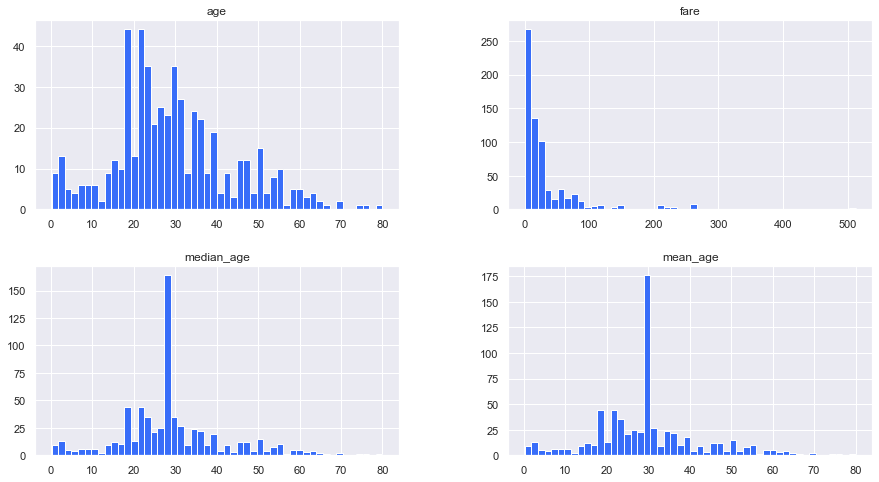

In [64]:
#creating the distribution plot
x2_train.hist(bins=50, figsize=(15,8))
plt.show()

#### Note for mean/ Median Imputation

In [65]:
#mean/median affect the variables of dataset.
x2_train.cov()

,age,fare,median_age,mean_age
age,212.767077,192.749092,212.767077,212.767030
fare,192.749092,2822.125685,157.307220,152.524565
median_age,212.767077,157.307220,168.961475,168.587653
mean_age,212.767030,152.524565,168.587653,168.584193


In [66]:
#we can see ['meadin_age'] and ['mean_age'] affecting ['fare']column

#### ALso for possible Outliers

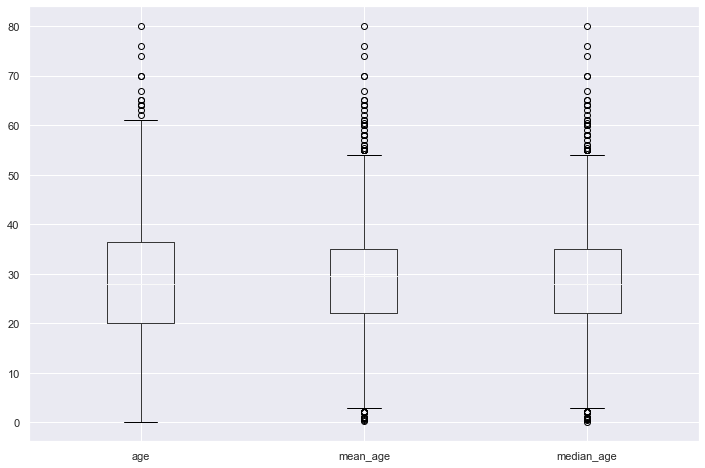

In [77]:
plt.figure(figsize=(12,8))
x2_train[['age', 'mean_age', 'median_age']].boxplot(),color;